In [1]:
#Assignment 2
#Comparison of the exponential and running mean for random
#Team 12
#Yaroslav Savotin, Elizaveta Pestova, Selamawit
#Skoltech, 2023

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#Part 1
#------------№1.1------------
n1 = 3000
n2 = 300
X1 = [0 for _ in range(n1)]
X2 = [0 for _ in range(n2)]
X1[0] = 10
X2[0] = 10

# normally distributed random noise with zero mathematical expectation and variance 
mu, sigma1 = 0, 19
w1 = np.random.normal(mu, np.sqrt(sigma1), [n1,1])
w2 = np.random.normal(mu, np.sqrt(sigma1), [n2,1])


for i in range(n1-1):
    X1[i+1] = X1[i] + w1[i+1]

for i in range(n2-1):
    X2[i+1] = X2[i] + w2[i+1]

In [26]:
#------------№1.2------------
Z1 = [0 for _ in range(n1)]
Z2 = [0 for _ in range(n2)]

# normally distributed random noise with zero mathematical expectation and variance 
mu, sigma2 = 0, 10
nu1 = np.random.normal(mu, np.sqrt(sigma2), [n1,1])
nu2 = np.random.normal(mu, np.sqrt(sigma2), [n2,1])


for i in range(n1):
    Z1[i] = X1[i] + nu1[i]

for i in range(n2):
    Z2[i] = X2[i] + nu2[i]

In [27]:
#------------№2------------
v1 = [0 for _ in range(n1)]
v2 = [0 for _ in range(n2)]
p1 = [0 for _ in range(n1)]
p2 = [0 for _ in range(n2)]

v1[0] = Z1[0]
v2[0] = Z2[0]
p1[0] = Z1[0]
p2[0] = Z2[0]
p1[1] = Z1[1]
p2[1] = Z2[1]

#Residual v
for i in range(1,n1):
    v1[i] = Z1[i] - Z1[i-1]
    
for i in range(1,n2):    
    v2[i] = Z2[i] - Z2[i-1]

#Residual p
for i in range(2,n1):
    p1[i] = Z1[i] - Z1[i-2]

for i in range(2,n2):
    p2[i] = Z2[i] - Z2[i-2]

In [28]:
Ev1 = 0
Ep1 = 0
for i in range(2,n1):
    Ev1 += (v1[i])**2
Ev1 = Ev1/(n1-1)   

for i in range(3,n1):
    Ep1 += (p1[i])**2 
Ep1 = Ep1/(n1-2) 

sigmaW1 = Ep1 - Ev1
sigmaN1 = (Ev1 - sigmaW1)/2
print(sigmaW1)
print(sigmaN1)

[20.25567026]
[9.12001231]


In [29]:
Ev2 = 0
Ep2 = 0
for i in range(2,n2):
    Ev2 += (v2[i])**2
Ev2 = Ev2/(n2-1)   

for i in range(3,n2):
    Ep2 += (p2[i])**2 
Ep2 = Ep2/(n2-2) 

sigmaW2 = Ep2 - Ev2
sigmaN2 = (Ev2 - sigmaW2)/2
print(sigmaW2)
print(sigmaN2)


[18.92813881]
[9.19206089]


In [30]:
# Comparison

#3000
print('N = 3000')
print('Error of consistent estimate sigmaW1 = ',np.abs(sigmaW1 - sigma1))
print('Error of consistent estimate sigmaN1 = ',np.abs(sigmaN1 - sigma2))
print()

#300
print('N = 300')
print('Error of consistent estimate sigmaW1 = ',np.abs(sigmaW2 - sigma1))
print('Error of consistent estimate sigmaN1 = ',np.abs(sigmaN2 - sigma2))

N = 3000
Error of consistent estimate sigmaW1 =  [1.25567026]
Error of consistent estimate sigmaN1 =  [0.87998769]

N = 300
Error of consistent estimate sigmaW1 =  [0.07186119]
Error of consistent estimate sigmaN1 =  [0.80793911]


In [21]:
#------------№3------------
ksi = sigmaW1/sigmaN1
alfa = (-ksi + np.sqrt(ksi**2 + 4*ksi))/2
alfa

array([0.77614074])

In [22]:
# exponential smoothing
Xsm = [0 for _ in range(n1)]
Xsm[0] = X1[0]
for i in range(1,n1):
    Xsm[i] = Xsm[i-1] + alfa*(Z1[i] - Xsm[i-1])

In [23]:
#preparation for plotting
k = [1 for _ in range(n1)]
for i in range(n1-1):
    k[i+1] = k[i] + 1
for i in range(1,n1):
    Xsm[i] = Xsm[i][0] 
for i in range(1,n1):
    X1[i] = X1[i][0] 

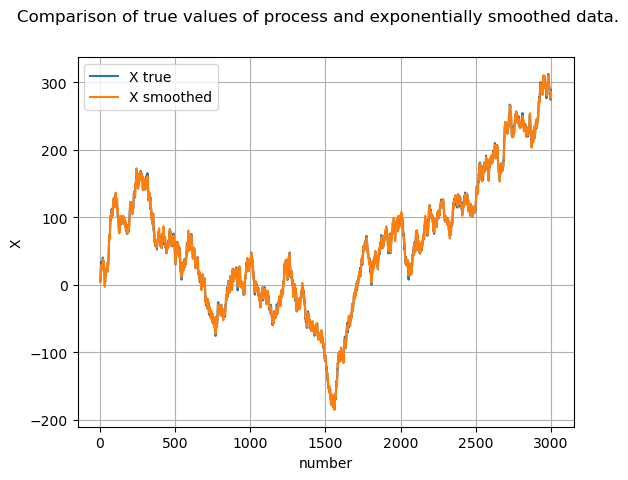

In [24]:
y1 = X1
y2 = Xsm
x = k
plt.plot(x,y1,label = 'X true')
plt.plot(x,y2,label = 'X smoothed')
plt.xlabel('number')
plt.ylabel('X')
plt.suptitle('Comparison of true values of process and exponentially smoothed data.')
plt.legend()
plt.grid(True)

In [31]:
#Part 2
#------------№1------------
n2 = 300
X2 = [0 for _ in range(n2)]
X2[0] = 10

# normally distributed random noise with zero mathematical expectation and variance 
mu, sigma1 = 0, 28**2
w2 = np.random.normal(mu, np.sqrt(sigma1), [n2,1])

for i in range(n2-1):
    X2[i+1] = X2[i] + w2[i+1]
    
#------------№2------------
Z2 = [0 for _ in range(n2)]

# normally distributed random noise with zero mathematical expectation and variance 
mu, sigma2 = 0, 97**2
nu2 = np.random.normal(mu, np.sqrt(sigma2), [n2,1])

for i in range(n2):
    Z2[i] = X2[i] + nu2[i]
    
#------------№3------------
ksi = sigma1/sigma2
alfa = (-ksi + np.sqrt(ksi**2 + 4*ksi))/2


#------------№4------------
M = int((2-alfa)/alfa)
sigmaRM = sigma2/M
sigmaES = (sigma2*alfa)/(2-alfa)

#------------№5------------
#running mean

R = [0 for _ in range(n2)]
sum = 0
r = int((M-1)/2) #3

for j in range(3,n2-3):
    for i in range(r+1):
        if i == 0:
            sum += Z2[j-i]
        else:
            sum += Z2[j-i] + Z2[j+i]
    R[j] = sum/M
    sum = 0
    
for j in range(r):
    for i in range(r):
        sum += Z2[j+i]
    R[j] = sum/r
    sum = 0
    
for j in range(n2-r,n2):
    for i in range(r):
        sum += Z2[j-i]
    R[j] = sum/r
    sum = 0

#Exponential mean
Xsm = [0 for _ in range(n2)]
Xsm[0] = X2[0]
for i in range(1,n2):
    Xsm[i] = Xsm[i-1] + alfa*(Z2[i] - Xsm[i-1])

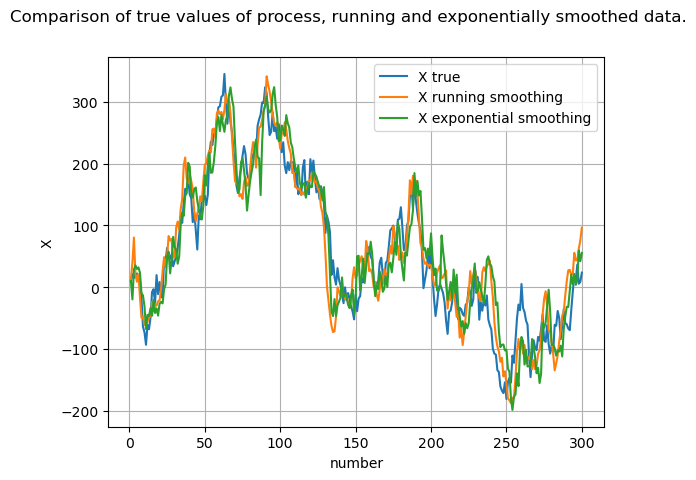

In [32]:
#preparation for plotting
k = [1 for _ in range(n2)]
for i in range(n2-1):
    k[i+1] = k[i] + 1
for i in range(1,n2):
    Xsm[i] = Xsm[i][0] 
for i in range(1,n2):
    X2[i] = X2[i][0] 
for i in range(0,n2):
    R[i] = R[i][0]
    
#plot
y1 = X2
y2 = R
y3 = Xsm
x = k
plt.plot(x,y1,label = 'X true')
plt.plot(x,y2,label = 'X running smoothing')
plt.plot(x,y3,label = 'X exponential smoothing')
plt.xlabel('number')
plt.ylabel('X')
plt.suptitle('Comparison of true values of process, running and exponentially smoothed data.')
plt.legend()
plt.grid(True)